# Part I - Ford Go Bike System
## by Wilkins Nduva

## Introduction


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loading the dataset
bike = pd.read_csv('Fordgobike.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bike.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
bike.shape

(183412, 16)

In [7]:
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### Data Wrangling

In [8]:
#1st let's check for null values
bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
#drop all the null values
bike = bike.dropna(inplace=True)

In [10]:
#change start_time and end_time data type to date
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

In [11]:
#change member birth year to int data type
bike.member_birth_year = bike.member_birth_year.astype('int64')
bike.member_birth_year.info()

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: member_birth_year
Non-Null Count   Dtype
--------------   -----
174952 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB


In [12]:
# calculate members age, I have used 2020 since it was the year the data was collected
bike['Age'] = 2020 - bike['member_birth_year']
bike.Age.sample(4)

36516     26
154597    44
170205    31
101538    59
Name: Age, dtype: int64

In [13]:
#drop values where age is greater than 80 years
bike = bike.query("Age <= 80")
bike.Age.describe()

count    174749.000000
mean         35.122335
std           9.871342
min          19.000000
25%          28.000000
50%          33.000000
75%          40.000000
max          79.000000
Name: Age, dtype: float64

In [14]:
# Column on only the start_time month 
bike['start_time_month'] = bike['start_time'].dt.strftime('%B')
bike.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,start_time_month
72818,595,2019-02-19 15:35:15.757,2019-02-19 15:45:10.887,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,5559,Subscriber,1987,Male,No,33,February
97684,742,2019-02-15 08:38:11.123,2019-02-15 08:50:33.746,25.0,Howard St at 2nd St,37.787522,-122.397405,88.0,11th St at Bryant St,37.770030,-122.411726,5031,Subscriber,1983,Male,No,37,February


In [15]:
# Column on only the start_time day of the week  
bike['start_time_day'] = bike['start_time'].dt.strftime('%A')
bike.sample(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,start_time_month,start_time_day
88431,311,2019-02-16 18:34:48.943,2019-02-16 18:40:00.642,66.0,3rd St at Townsend St,37.778742,-122.392741,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,4633,Subscriber,1973,Male,No,47,February,Saturday
17199,765,2019-02-27 07:19:18.602,2019-02-27 07:32:03.616,52.0,McAllister St at Baker St,37.777416,-122.441838,77.0,11th St at Natoma St,37.773507,-122.416040,6116,Subscriber,1994,Female,No,26,February,Wednesday
3852,406,2019-02-28 16:52:42.907,2019-02-28 16:59:29.105,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,81.0,Berry St at 4th St,37.775880,-122.393170,5451,Subscriber,1987,Other,No,33,February,Thursday
85211,837,2019-02-17 15:40:50.465,2019-02-17 15:54:47.760,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,258.0,University Ave at Oxford St,37.872355,-122.266447,26,Subscriber,1995,Male,No,25,February,Sunday


In [16]:
# Start time hour
bike['start_time_hour'] = bike['start_time'].dt.hour
bike.start_time_hour.describe()

count    174749.000000
mean         13.456106
std           4.735567
min           0.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: start_time_hour, dtype: float64

In [17]:
# Duration in seconds to duration in minutes
bike['duration_min'] = bike['duration_sec']/60
bike.duration_min.describe()

count    174749.000000
mean         11.738343
std          27.384592
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [18]:
#round of the duration in minutes
bike['duration_min'] = bike.duration_min.apply(np.ceil)
bike.duration_min.sample(3)

70214     6.0
69562    20.0
63125     7.0
Name: duration_min, dtype: float64

In [19]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,start_time_month,start_time_day,start_time_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,36,February,Thursday,17,870.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,48,February,Thursday,12,1031.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,31,February,Thursday,17,609.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,46,February,Thursday,23,27.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,61,February,Thursday,23,30.0


In [20]:
#drop unnecessary columns
bike.drop(['duration_sec','start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude', 'member_birth_year'], axis=1, inplace=True)

In [21]:
bike.sample(3)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,Age,start_time_month,start_time_day,start_time_hour,duration_min
102255,2019-02-14 16:44:56.574,2019-02-14 16:52:19.189,33.0,Golden Gate Ave at Hyde St,75.0,Market St at Franklin St,5468,Subscriber,Male,No,30,February,Thursday,16,8.0
114460,2019-02-12 09:33:57.921,2019-02-12 09:39:58.629,250.0,North Berkeley BART Station,257.0,Fifth St at Delaware St,3467,Subscriber,Female,No,43,February,Tuesday,9,6.0
151553,2019-02-06 17:14:44.609,2019-02-06 17:18:43.139,88.0,11th St at Bryant St,60.0,8th St at Ringold St,5276,Subscriber,Male,No,56,February,Wednesday,17,4.0


### What is the structure of your dataset?

> The dataset contains 183215 rows and 16 columns

> The columns have different data types i.e. int, objects, date and float

### What is/are the main feature(s) of interest in your dataset?

> When are most trips taken in terms of time of day, day of the week, or month of the year?

> How long does the average trip take?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Start time and end time of the trips. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [22]:
#create a copy to work on
bike2 = bike.copy() 

In [23]:
#function to plot a pie chat
def plot_pie(bike2, title):
    bike2.plot(kind='pie', figsize=(8,8), autopct='%1.0f%%', ylabel = (""))
    plt.title(title, fontweight = 'bold')
    plt.show()

In [24]:
#function to plot a horizontal bar chat
def plot_barh(bike2, xlabel, ylabel, title):
    bike2.plot(kind ='barh', color = 'fuchsia', figsize=(8,8))
    plt.xlabel(xlabel, color = 'tomato', fontsize = 10)
    plt.ylabel(ylabel, color = 'darkblue', fontsize = 10)
    plt.title(title, fontweight = 'bold')
    plt.show()

In [25]:
#function to plot a vertical bar chat
def plot_bar(bike2, xlabel, ylabel, title):
    bike2.plot(kind ='bar', color = 'tomato', figsize=(8,8))
    plt.xlabel(xlabel, color = 'darkblue', fontsize = 10)
    plt.ylabel(ylabel, color = 'orangered', fontsize = 10)
    plt.title(title, fontweight = 'bold')
    plt.show()

In [26]:
#function to plot a bar chat
def plot_bar(bike2, xlabel, ylabel, title):
    bike2.plot(kind ='bar', color = 'crimson', figsize=(8,8))
    plt.xlabel(xlabel, color = 'darkblue', fontsize = 10)
    plt.ylabel(ylabel, color = 'red', fontsize = 10)
    plt.title(title, fontweight = 'bold')
    plt.show()

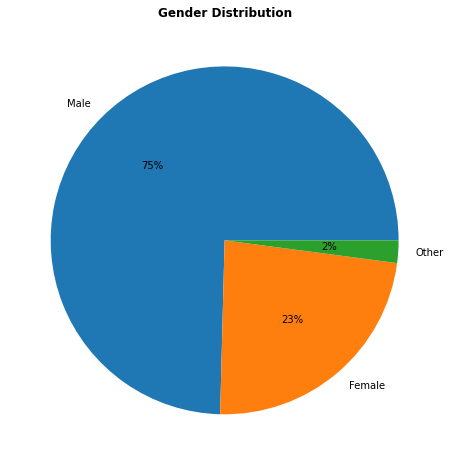

In [27]:
#visualizing gender distribution of the member bike users
bike2_gen = bike2['member_gender'].value_counts()
plot_pie(bike2_gen, 'Gender Distribution')

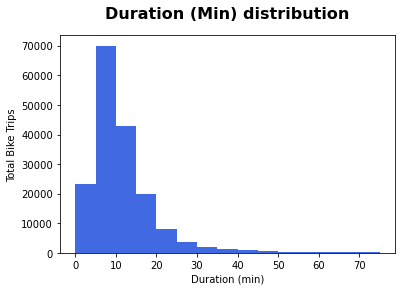

In [28]:
#Age distribution
bin_edges = np.arange(0, 80, 5)
plt.hist(data = bike2,
         x = 'duration_min', 
         color = "royalblue",
         bins = bin_edges);
plt.xlabel('Duration (min)')
plt.ylabel('Total Bike Trips')
plt.title("Duration (Min) distribution", y=1.05, fontsize=16, fontweight='bold');

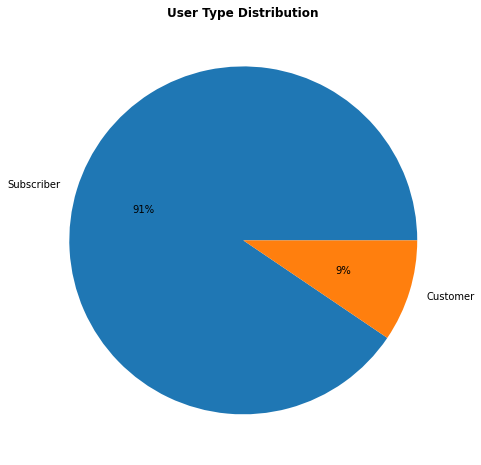

In [29]:
#visualizing user_type distribution of the members bike users
bike2_gen = bike2['user_type'].value_counts()
plot_pie(bike2_gen, 'User Type Distribution')

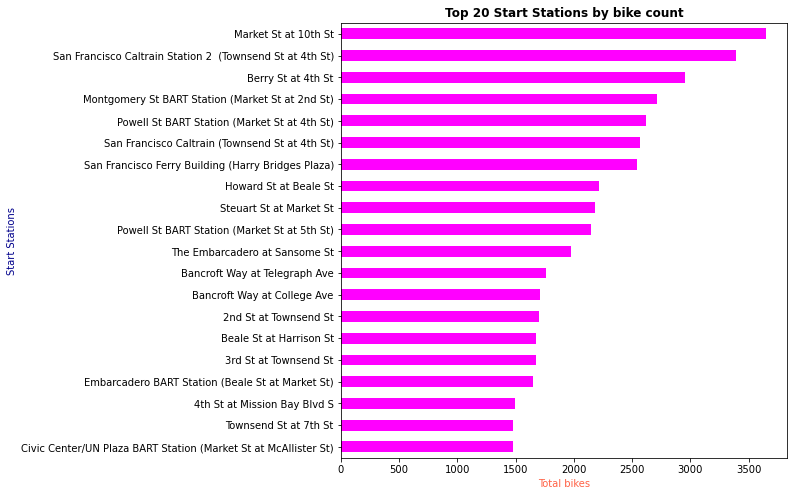

In [30]:
#let's plot the top 20 stations by bike count
bike2_station = bike2['start_station_name'].value_counts()[:20].sort_values()
plot_barh(bike2_station, 'Total bikes', 'Start Stations','Top 20 Start Stations by bike count')

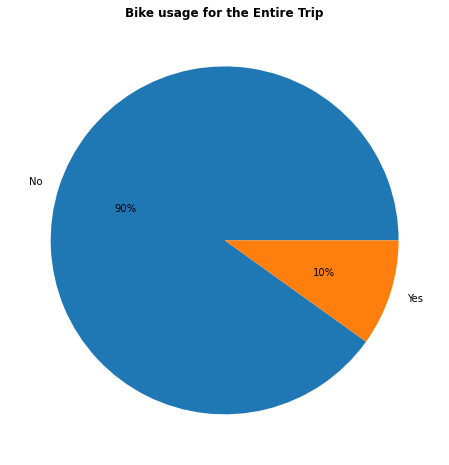

In [31]:
#visualizing user_type distribution of the members bike users
bike2_all_trip = bike2['bike_share_for_all_trip'].value_counts()
plot_pie(bike2_all_trip, 'Bike usage for the Entire Trip')

In [45]:
bike2_day = bike2['start_time_day'].value_counts()
bike2_day

Thursday     33689
Tuesday      30558
Wednesday    28396
Friday       27619
Monday       25588
Sunday       14492
Saturday     14407
Name: start_time_day, dtype: int64

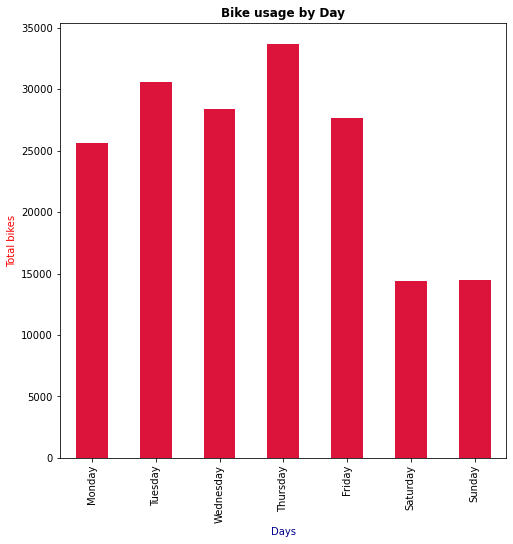

In [33]:
#Busiest day of the week by start_time
bike2_day = bike2['start_time_day'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plot_bar(bike2_day, 'Days','Total bikes','Bike usage by Day');

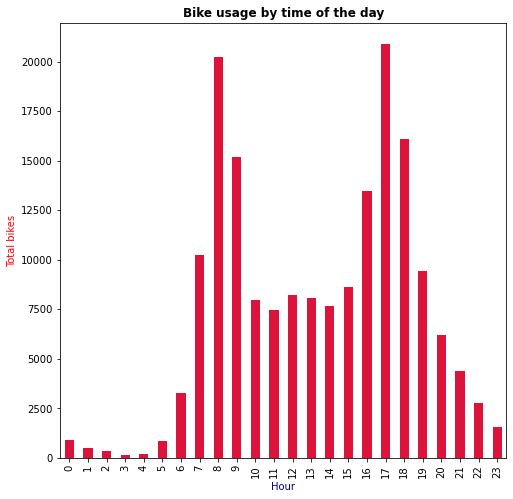

In [34]:
#Busiest hour of the day by start_time
bike2_hour = bike2['start_time_hour'].value_counts().sort_index()
plot_bar(bike2_hour, 'Hour','Total bikes','Bike usage by time of the day');

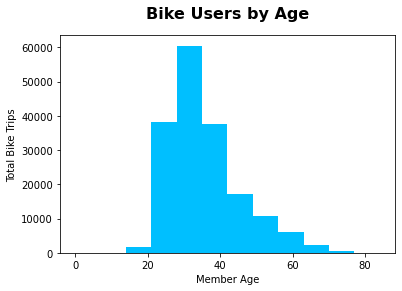

In [35]:
#Age distribution
bin_edges = np.arange(0, 90, 7)
plt.hist(data = bike2,
         x = 'Age', 
         color = "deepskyblue",
         bins = bin_edges);
plt.xlabel('Member Age')
plt.ylabel('Total Bike Trips')
plt.title("Bike Users by Age", y=1.05, fontsize=16, fontweight='bold');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I didn't find anything unsual about the distribution of the variables I visualized so I didn't need to perform any transformations

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Needed to remove the null values

> Split the start_time to month, day and hour to get a clear picture of the busiest period distribution

## Bivariate Exploration

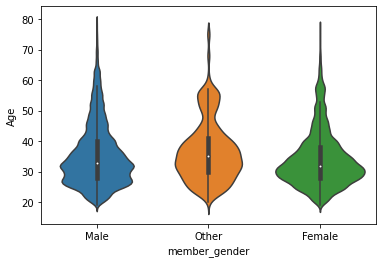

In [36]:
# plotting violin 
sb.violinplot(data=bike2, x='member_gender', y='Age', innner=None, meanline_visible=True);

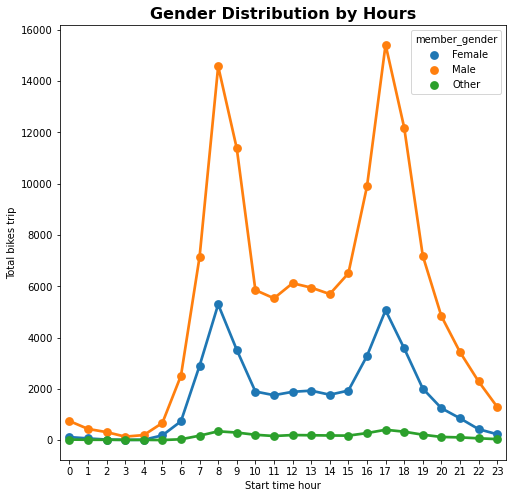

In [37]:
#Gender Distribution by Hours
plt.figure(figsize=(8, 8))
bike2_hr_gen =bike2.groupby(["start_time_hour","member_gender"]).size().reset_index()
sb.pointplot(data=bike2_hr_gen, x= "start_time_hour", hue="member_gender",y=0, linestyles='-')
plt.ylabel("Total bikes trip")
plt.xlabel("Start time hour")
plt.title("Gender Distribution by Hours",fontsize=16, fontweight='bold');

In [38]:
bike2.head(2)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,Age,start_time_month,start_time_day,start_time_hour,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,36,February,Thursday,17,870.0
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,48,February,Thursday,12,1031.0


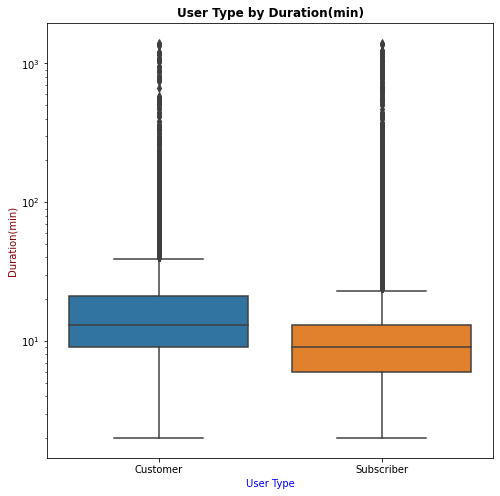

In [39]:
plt.figure(figsize=[8,8])
sb.boxplot(data=bike2,x='user_type',y='duration_min')
plt.xlabel('User Type', color = 'blue')
plt.ylabel('Duration(min)', color = 'maroon')
plt.yscale('log')
plt.title('User Type by Duration(min)',fontweight='bold');

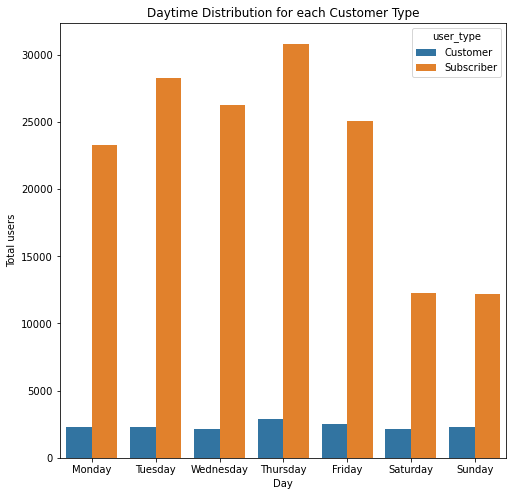

In [40]:
plt.figure(figsize=[8,8])
order = 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
sb.countplot(data = bike2, x = 'start_time_day', hue = 'user_type', order = order);
plt.xlabel('Day')
plt.ylabel('Total users')
plt.title('Daytime Distribution for each Customer Type');

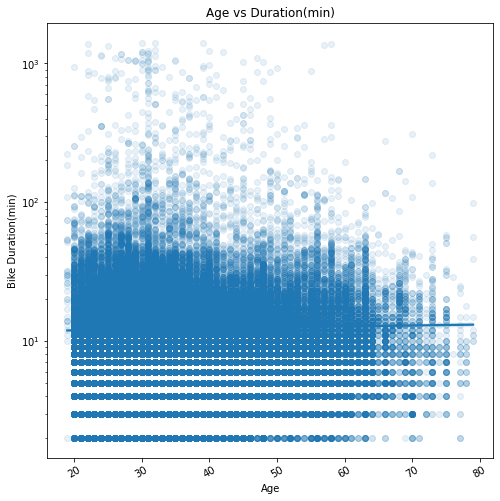

In [46]:
plt.figure(figsize=(8,8))
sb.regplot(data=bike2 ,x='Age', y='duration_min',scatter_kws={'alpha':1/10})
plt.xlabel('Age')
plt.ylabel('Bike Duration(min)')
plt.xticks(rotation=30)
plt.yscale('log')
plt.title('Age vs Duration(min)');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Customers took longer bike trips compared to subscribed members

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The male took longer trips compared to female members

## Multivariate Exploration

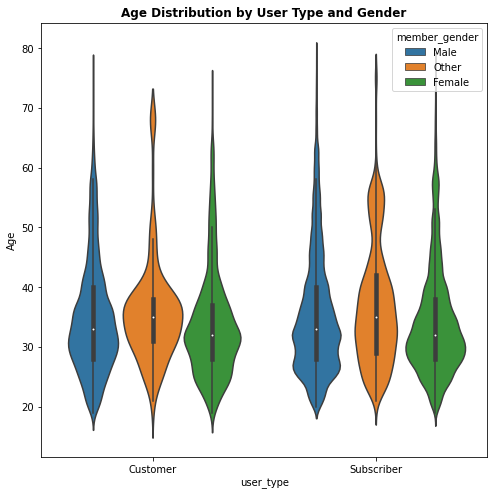

In [42]:
# plotting violin 
plt.figure(figsize=[8,8])
sb.violinplot(data=bike2, x='user_type', y='Age', hue= 'member_gender',innner='quartile');
plt.title("Age Distribution by User Type and Gender", fontweight='bold');

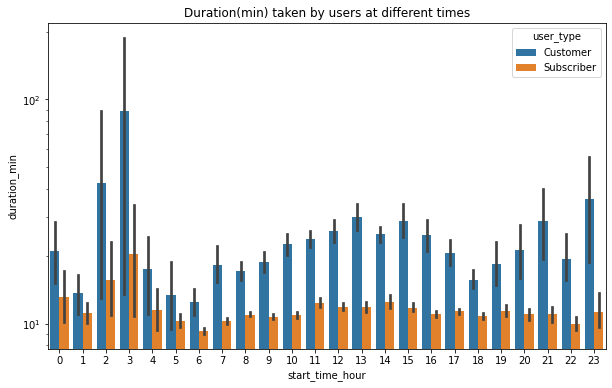

In [43]:
plt.figure(figsize=[10,6])
sb.barplot(data = bike2, x = 'start_time_hour', y = 'duration_min', hue = 'user_type')
plt.legend(loc = 1, title = 'user_type')
plt.yscale('log')
plt.title('Duration(min) taken by users at different times');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The busiest hour of the day was on Thursday with many bike trips, however, longer bike trips were experienced at 3 am in the morning followed by 2 am. The least trip duration time was at 6 am for both customers and subscribers.

## Conclusions
> Customer user type trips take a longer duration compared to subscriber user type.

> We have more male member bike users compared to the female

> 91% of the users were subscribers

> 90% bike users didn't use the bike for their entire trip